# Research on phone plan revenue <a name="introduction"></a>

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

We'll go through the steps outlined below to get meaningful information from the data given to us:
 - *Step 1: Open data & study general information.* This gives us a broad overview of the data and helps us spot any immediate problems that need to be fixed before beginning our analysis.
 - *Step 2: Data preprocessing.* Here, we fix all of the problems with the data such as missing values, duplicates, and changing data types. For this project, we'll also address anomalies in the data such as calls with durations that are zero.  Prepreprocessing includes manipulating the raw data to get intermediary values that we'll then use in the analysis.
 - *Step 3: Analyze the data.* Here, we'll find minutes, texts, and volume of data the users of each plan require per month, calculate the mean, dispersion, and standard deviation, and plot histograms of the data.
 - *Step 4: Hypothesis testing.* We'll test two hypotheses in the final part of the analysis with the goal of discerning whether or not different segments generate a statistically meaningful difference in revenue per month. This information helps Marketing to target advertising resources more effectively in order to maximize revenues and profits.
 - *Step 5: General conclusion.* This section provides a general overview of the projet and reccommendations from the analysis.

### Step 1: Open data file & look at general info <a name="step_1"></a>

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats as st

# try-except blocks handle errors that occur from changing file directories

new_dfs = {'calls_data': ['megaline_calls.csv', '/datasets/megaline_calls.csv'],
           'internet_data': ['megaline_internet.csv', '/datasets/megaline_internet.csv'],
           'messages_data': ['megaline_messages.csv', '/datasets/megaline_messages.csv'],
           'plans_data': ['megaline_plans.csv', '/datasets/megaline_plans.csv'],
           'users_data': ['megaline_users.csv', '/datasets/megaline_users.csv']
          }

for new_df, csv_path in new_dfs.items():
    try:
        exec(new_df + ' = pd.read_csv(csv_path[0])')
    except:
        exec(new_df + ' = pd.read_csv(csv_path[1])')

In [2]:
# print head for each new DataFrame

for new_df in new_dfs.keys():
    print('------- ' + new_df.upper() + ' HEAD -------')
    exec('print(' + new_df + '.head())')
    print('')
    print('')

------- CALLS_DATA HEAD -------
         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


------- INTERNET_DATA HEAD -------
         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


------- MESSAGES_DATA HEAD -------
         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


------- PLANS_DATA HEAD -------
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1         

In [3]:
# print some descriptive statistics for data

for new_df in list(new_dfs.keys())[0:4]:
    print('------- ' + new_df.upper() + ' STATS -------')
    exec('print(' + new_df + '.describe())')
    print('')
    print('')

------- CALLS_DATA STATS -------
             user_id       duration
count  137735.000000  137735.000000
mean     1247.658046       6.745927
std       139.416268       5.839241
min      1000.000000       0.000000
25%      1128.000000       1.290000
50%      1247.000000       5.980000
75%      1365.000000      10.690000
max      1499.000000      37.600000


------- INTERNET_DATA STATS -------
             user_id        mb_used
count  104825.000000  104825.000000
mean     1242.496361     366.713701
std       142.053913     277.170542
min      1000.000000       0.000000
25%      1122.000000     136.080000
50%      1236.000000     343.980000
75%      1367.000000     554.610000
max      1499.000000    1693.470000


------- MESSAGES_DATA STATS -------
            user_id
count  76051.000000
mean    1245.972768
std      139.843635
min     1000.000000
25%     1123.000000
50%     1251.000000
75%     1362.000000
max     1497.000000


------- PLANS_DATA STATS -------
       messages_included  mb

In [4]:
# print general information

for new_df in new_dfs.keys():
    print('------- ' + new_df.upper() + ' INFO -------')
    exec('print(' + new_df + '.info())')
    print('')
    print('')

------- CALLS_DATA INFO -------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


------- INTERNET_DATA INFO -------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


------- MESSAGES_DATA INFO -------
<class 'pandas.core.frame.Data

In [5]:
# checking for duplicate rows in each DataFrame

print('Duplicated calls data:', calls_data.duplicated().sum())
print('Duplicated internet data:', internet_data.duplicated().sum())
print('Duplicated messages data:', messages_data.duplicated().sum())
print('Duplicated plans data:', plans_data.duplicated().sum())
print('Duplicated users data:', users_data.duplicated().sum())

Duplicated calls data: 0
Duplicated internet data: 0
Duplicated messages data: 0
Duplicated plans data: 0
Duplicated users data: 0


### Conclusion <a name="step_1_conclusion"></a>

After our initial overview of the data, we can see there are a few problems that we should fix before proceeding.
- The **churn_date** column has missing values. Missing values in the **churn_date** column mean the customer is still subscribed to one of the plans. We can replace these with the 2018-12-31, the last day of the year.
- We should change all dates from *object* to *datetime* data types to make them easier to work with when calculating duration between dates.
- All of the **user_id** columns should be changed from *int64* to *object* since we won't be doing any mathematical operations on user IDs.
- The **duration** column needs to be rounded up to minutes, and then changed from *float64* to *int64*
- **usd_per_message** and **usd_per_minute** can be changed to *int64*
- **mb_used** is the data used per session. We need to calculate the total data used per month, round up to the nearest gb, and change type to *int64*
- There are some call durations that are 0. These could be missed calls. We need to figure out what to do with them.
- We need to check if there are any calls, messages, or sessions that occurred before or after registration and churn dates for any given user.

### Step 2: Data preprocessing <a name="step_2"></a>

#### Filling missing values <a name="step_2_1"></a>

In [6]:
# fill missing churn dates with December 31st, 2018 as a placeholder

users_data['churn_date'].fillna('2018-12-31', inplace=True)

#### Changing data types <a name="step_2_2"></a>

In [7]:
# create list of date columns & change to datetime with .to_datetime() method

date_cols = ["calls_data['call_date']", "internet_data['session_date']", "messages_data['message_date']", \
             "users_data['reg_date']", "users_data['churn_date']"]

for col in date_cols:
    exec(col + " = pd.to_datetime(" + col + ", format='%Y-%m-%d')")

In [8]:
# define list of 'user_id' columns & change to strings

user_id_cols = ["calls_data['user_id']", "internet_data['user_id']", "messages_data['user_id']", "users_data['user_id']"]

for col in user_id_cols:
    exec(col + " = " + col + ".astype(str)")

In [9]:
# round up 'duration', change to int64

calls_data['duration'] = np.ceil(calls_data['duration']).astype('int64')

In [10]:
# change 'usd_per_message' & 'usd_per_minute' to int64

plans_data[['usd_per_minute', 'usd_per_message']] = plans_data['usd_per_minute'].astype('int64')

In [11]:
# check final results after replacing mising values and changing data types

for new_df in new_dfs.keys():
    print('------- ' + new_df.upper() + ' INFO -------')
    exec('print(' + new_df + '.info())')
    print('')
    print('')

------- CALLS_DATA INFO -------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  object        
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 4.2+ MB
None


------- INTERNET_DATA INFO -------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  object        
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), obje

#### Call durations that are 0 <a name="step_2_3"></a>

Aside from filling missing values and converting data types, we also need to look at an interesting aspect of the **duration** column in the **calls_data** DataFrame. A significant portion of these values are 0, which are most likely missed calls. Let's look at what percentage of these are missed calls to determine whether or not to keep these roew for our final analysis.

In [12]:
# find percentage of missed calls

missed_calls = calls_data['duration'].value_counts()[0]
all_calls = calls_data['duration'].count()

print('Total number of missed calls: {}'.format(missed_calls))
print('Total number of calls: {}'.format(all_calls))
print('Percentage of missed calls: {:.2f}%'.format(missed_calls / all_calls * 100))

Total number of missed calls: 26834
Total number of calls: 137735
Percentage of missed calls: 19.48%


Around a fifth of the data in the **calls_data** DataFrame is from missed calls. This is a significant portion, and it's probably best to keep it. We need to keep in mind though that is can skew the mean of the **call_duration** column of we were to ever need that in our analysis.

#### Calls, messages, & data prior to registration & after churn dates <a name="step_2_4"></a>

We need to check if there are any calls, data sessions or messages sent before or after the registration and churn dates for any given user. We can compare the 'min' and 'max' dates (first and last observations) for each user with their churn and registration dates to see if there are any anomalies.

In [13]:
# checking for calls, messages, or data sessions that occur outside subsription dates

call_dates_by_user = calls_data.groupby('user_id')['call_date'].unique()
message_dates_by_user = messages_data.groupby('user_id')['message_date'].unique()
session_dates_by_user = internet_data.groupby('user_id')['session_date'].unique()

users_data.set_index('user_id', inplace=True)

call_after_churn = []
message_after_churn = []
session_after_churn = []

call_before_reg = []
message_before_reg = []
session_before_reg = []

for user in range(1000, 1500):
    user = str(user)
    try:
        if call_dates_by_user[user].min() < users_data.loc[user, 'reg_date']:  # is first call before registration?
            call_before_reg.append(user)
        if call_dates_by_user[user].max() > users_data.loc[user, 'churn_date']:  # is last call after churn date?
            call_after_churn.append(user)
    except KeyError:
        pass
    try:
        if message_dates_by_user[user].min() < users_data.loc[user, 'reg_date']:  # is first message before registration?
            message_before_reg.append(user)
        if message_dates_by_user[user].max() > users_data.loc[user, 'churn_date']:  # is last message after churn date?
            message_after_churn.append(user)
    except KeyError:
        pass
    try:
        if session_dates_by_user[user].min() < users_data.loc[user, 'reg_date']:  # is first session before registration?
            session_before_reg.append(user)
        if session_dates_by_user[user].max() > users_data.loc[user, 'churn_date']:  # is last session after churn date?
            session_after_churn.append(user)
    except KeyError:
        pass

users_data.reset_index(inplace=True)

print(call_after_churn)
print(call_before_reg)

print(message_after_churn)
print(message_before_reg)

print(session_after_churn)
print(session_before_reg)

['1006', '1012', '1022', '1040', '1050', '1067', '1083', '1084', '1094', '1106', '1172', '1180', '1191', '1220', '1246', '1281', '1296', '1298', '1300', '1315', '1358', '1363', '1402', '1414', '1416', '1441', '1451', '1466', '1467', '1491']
[]
['1006', '1067', '1083', '1084', '1094', '1172', '1180', '1191', '1220', '1246', '1281', '1296', '1298', '1315', '1358', '1363', '1414', '1416', '1441', '1451', '1466', '1467', '1491']
[]
['1006', '1012', '1022', '1040', '1050', '1067', '1083', '1084', '1094', '1106', '1172', '1180', '1191', '1220', '1246', '1281', '1296', '1298', '1300', '1315', '1358', '1363', '1402', '1414', '1416', '1441', '1451', '1466', '1467', '1491']
[]


After screening our users, we can see there are a considerable number of them who made calls, sent messages, or used data after the churn date. The most likely reason for this is because the churn date only shows the date their plan was cancelled, not when their service is interrupted. If the churn date falls in the middle of the month and the customer has already paid for 1 month of service, they can still use the service until the end of the month. Either way, this discovery will not have any implications further into the analysis and we can leave this data alone.

#### Monthly sums & counts using pivot tables <a name="step_2_5"></a>
For each unique user, we need to find the following to carry out our analysis:
- number of calls made per month
- minutes used per month
- number of text messages per month
- volume of data per month
- monthly revenue from each user

We can do this using pivot tables. For each DataFrame, we can add a new column with the month each event or observation occured in. Then, we use a pivot table with index set as **user_id** and columns for each month. The aggfunc argument controls the operation we want to perform. In this case, it will be either **sum** or **count**.

##### Calls per month per user <a name="step_2_5_1"></a>

In [14]:
# create new 'call_month' column
calls_data['call_month'] = pd.DatetimeIndex(calls_data['call_date']).month

# pivot table counts unique calls per month for each user
calls_per_month = calls_data.pivot_table(index='user_id', values='id', columns='call_month', aggfunc='count', fill_value=0)
calls_per_month.head()

call_month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,0,16
1001,0,0,0,0,0,0,0,27,49,65,64,56
1002,0,0,0,0,0,0,0,0,0,11,55,47
1003,0,0,0,0,0,0,0,0,0,0,0,149
1004,0,0,0,0,21,44,49,49,42,61,54,50


##### Minutes per month per user <a name="step_2_5_2"></a>

In [15]:
# pivot table sums call durations for each month for each user
mins_per_month = calls_data.pivot_table(index='user_id', values='duration', columns='call_month', aggfunc='sum', fill_value=0)
mins_per_month.head()

call_month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,0,124
1001,0,0,0,0,0,0,0,182,315,393,426,412
1002,0,0,0,0,0,0,0,0,0,59,386,384
1003,0,0,0,0,0,0,0,0,0,0,0,1104
1004,0,0,0,0,193,275,381,354,301,365,476,427


##### Messages per month per user <a name="step_2_5_3"></a>

In [16]:
# create new 'message_month' column
messages_data['message_month'] = pd.DatetimeIndex(messages_data['message_date']).month

# pivot table counts messages sent per month for each user
messages_per_month = messages_data.pivot_table(index='user_id', values='id', columns='message_month', aggfunc='count', fill_value=0)
messages_per_month.head()

message_month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,0,11
1001,0,0,0,0,0,0,0,30,44,53,36,44
1002,0,0,0,0,0,0,0,0,0,15,32,41
1003,0,0,0,0,0,0,0,0,0,0,0,50
1004,0,0,0,0,7,18,26,25,21,24,25,31


##### Data per month per user <a name="step_2_5_4"></a>
The fictional company Megaline rounds monthly web data usage totals to the nearest gigabyte. Individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes. 1 GB = 1024 MB for this calculation.

In [17]:
# create new 'session_month' column
internet_data['session_month'] = pd.DatetimeIndex(internet_data['session_date']).month

# pivot table sums mb used per month for each user
gb_per_month = internet_data.pivot_table(index='user_id', values='mb_used', columns='session_month', aggfunc='sum', fill_value=0)

# round to nearest GB, change type to int64
gb_per_month = np.ceil(gb_per_month / 1024).astype('int64')
gb_per_month.head()

session_month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,0,2
1001,0,0,0,0,0,0,0,7,14,22,19,19
1002,0,0,0,0,0,0,0,0,0,7,19,15
1003,0,0,0,0,0,0,0,0,0,0,0,27
1004,0,0,0,0,7,21,24,28,19,15,22,21


##### Revenue per month per user <a name="step_2_5_5"></a>
To find monthly revenue, we need to subtract the free monthly package limits from the total number of calls, text messages, and data per month. Then, we multiply the result by the calling plan value and add the monthly charge depending on the calling plan. Plans are outlined below:

**Surf**
* Monthly charge: \\$20.00
    * 500 monthly minutes
    * 50 texts
    * 15 GB of data
* After exceeding the package limits:
    * 1 minute: \\$0.03
    * 1 text message: \\$0.03
    * 1 GB of data: \\$10.00

**Ultimate**
* Monthly charge: \\$70.00
    * 3000 monthly minutes
    * 1000 texts
    * 30 GB of data
* After exceeding the package limits:
    * 1 minute: \\$0.01
    * 1 text message: \\$0.01
    * 1 GB of data: \\$7.00

We can handle this with a function that takes the **user_id**, **plan**, **reg_month**, and **churn_month** from the **users_data** DataFrame as arguments. We can then use the function along with the pandas .apply() method to create a DataFrame similar to our previous 4 pivot tables. Each row will show the user ID and revenue for each month of the year.

In [18]:
# add registration month & churn month columns to users_data DataFrame

users_data['reg_month'] = pd.DatetimeIndex(users_data['reg_date']).month
users_data['churn_month'] = pd.DatetimeIndex(users_data['churn_date']).month
users_data.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month,churn_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,12,12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,8,12
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-31,10,12
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31,1,12
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-31,5,12


In [19]:
# function takes row from users_data as argument

def calc_monthly_rev(row):
    
    plan = row['plan']
    user_id = row['user_id']
    reg_month = row['reg_month']
    churn_month = row['churn_month']

    if plan == 'surf':           
        try:
            excess_mins_rev = (mins_per_month.loc[user_id] - 500).clip(lower=0) * 0.03  # revenue from minutes overages 
        except KeyError:
            excess_mins_rev = 0  # if the user ID is missing (KeyError), there were no minutes used & revenue is 0
        try:
            excess_text_rev = (messages_per_month.loc[user_id] - 50).clip(lower=0) * 0.03  # revenue from text overages
        except KeyError:
            excess_text_rev = 0  # if the user ID is missing (KeyError), there were no texts sent & revenue is 0
        try:
            excess_data_rev = (gb_per_month.loc[user_id] - 15).clip(lower=0) * 10  # revenue from data overages
        except KeyError:
            excess_data_rev = 0  # if the user ID is missing (KeyError), there no data was used & revenue is 0

        monthly_rev = excess_mins_rev + excess_text_rev + excess_data_rev + 20  # sum oveages plus flat monthly plan fee

    if plan == 'ultimate':
        try:
            excess_mins_rev = (mins_per_month.loc[user_id] - 3000).clip(lower=0) * 0.01
        except KeyError:
            excess_mins_rev = 0
        try:
            excess_text_rev = (messages_per_month.loc[user_id] - 1000).clip(lower=0) * 0.01
        except KeyError:
            excess_text_rev = 0
        try:
            excess_data_rev = (gb_per_month.loc[user_id] - 30).clip(lower=0) * 7
        except KeyError:
            excess_data_rev = 0
            
        monthly_rev = excess_mins_rev + excess_text_rev + excess_data_rev + 70
    
    # this try-except block sets revenue to 0 for months prior to registration month & after churn month 
    try:
        monthly_rev.where(cond=(reg_month <= monthly_rev.index) & (monthly_rev.index <= churn_month), other=0, inplace=True)
        
    except AttributeError:
        monthly_rev = 0
        
    
    return monthly_rev

In [20]:
# .apply() method returns DataFrame with monthly revenues per user

rev_per_month = users_data.apply(calc_monthly_rev, axis=1)
rev_per_month.set_index(users_data['user_id'], inplace=True)
rev_per_month.head()

,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,70.00
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,90.09,60.0,60.00
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.00,60.0,20.00
1003,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.00,20.0,158.12
1004,0.0,0.0,0.0,0.0,20.0,80.0,110.0,150.0,60.0,20.00,90.0,80.00


### Conclusion <a name="step_2_conclusion"></a>

We covered a lot of ground in Step 2. Let's recap what we did here:
- Replaced missing values in the **churn_date** column with 2018-12-31, the last day of the year.
- Changed all dates from *object* to *datetime* data type
- Changed **user_id** columns from *int64* to *object* data type
- Rounded the **duration** column up to minutes, and changed type from *float64* to *int64*
- Changed **usd_per_message** and **usd_per_minute** to *int64*
- Calculated the total data used per month, rounded up to the nearest gb, and changed type to *int64*
- Decided to keep the data where **call_duration** was zero
- Found where messages, sessions, and calls occurred after the churn date. We decided to keep this data as well
- Found monthly sums and counts using pivot tables for the following:
    - number of calls made per month
    - minutes used per month
    - number of text messages per month
    - volume of data per month
    - monthly revenue from each user

### Step 3: Analyze the data <a name="step_3"></a>

Next, we'll find the minutes, texts, and volume of data the users of each plan require per month. Then, we'll calculate the mean, dispersion, and standard deviation. We'll also calculate this information without zero values and then use it to plot some histograms. Finally, we'll describe the distributions for this data.

In [21]:
# get user IDs for people on the surf plan and people on the ultimate plan

surfers = users_data.query('plan == "surf"')['user_id']
ultimaters = users_data.query('plan == "ultimate"')['user_id']

In [22]:
# new DataFrames for monthly minutes, texts, data, & stats for each plan

pivot_tables = ['mins_per_month', 'messages_per_month', 'gb_per_month', 'rev_per_month']

for table in pivot_tables:
    exec('surfers_' + table + ' = ' + table + '[' + table + '.index.isin(surfers)]')
    exec('ultimaters_' + table + ' = ' + table + '[' + table + '.index.isin(ultimaters)]')
    
    exec('surfers_' + table + '_stats = surfers_' + table + '.aggregate(["mean", "std", "var"]).round(2)')
    exec('ultimaters_' + table + '_stats = ultimaters_' + table + '.aggregate(["mean", "std", "var"]).round(2)')

In [23]:
# new DataFrames for monthly minutes, texts, data, & stats for each plan excluding zeros

mins_per_month_no_zeros = calls_data.pivot_table(index='user_id', values='duration', columns='call_month', aggfunc='sum')

surfers_mins_per_month_no_zeros = mins_per_month_no_zeros[mins_per_month_no_zeros.index.isin(surfers)]
surfers_mins_per_month_no_zeros_stats = surfers_mins_per_month_no_zeros.aggregate(['nanmean', 'nanstd', 'nanvar'])

ultimaters_mins_per_month_no_zeros = mins_per_month_no_zeros[mins_per_month_no_zeros.index.isin(ultimaters)]
ultimaters_mins_per_month_no_zeros_stats = ultimaters_mins_per_month_no_zeros.aggregate(['nanmean', 'nanstd', 'nanvar'])



messages_per_month_no_zeros = messages_data.pivot_table(index='user_id', values='id', columns='message_month', aggfunc='count')

surfers_messages_per_month_no_zeros = messages_per_month_no_zeros[messages_per_month_no_zeros.index.isin(surfers)]
surfers_messages_per_month_no_zeros_stats = surfers_messages_per_month_no_zeros.aggregate(['nanmean', 'nanstd', 'nanvar'])

ultimaters_messages_per_month_no_zeros = messages_per_month_no_zeros[messages_per_month_no_zeros.index.isin(ultimaters)]
ultimaters_messages_per_month_no_zeros_stats = ultimaters_messages_per_month_no_zeros.aggregate(['nanmean', 'nanstd', 'nanvar'])



gb_per_month_no_zeros = internet_data.pivot_table(index='user_id', values='mb_used', columns='session_month', aggfunc='sum')
gb_per_month_no_zeros = np.ceil(gb_per_month_no_zeros / 1024)

surfers_gb_per_month_no_zeros = gb_per_month_no_zeros[gb_per_month_no_zeros.index.isin(surfers)]
surfers_gb_per_month_no_zeros_stats = surfers_gb_per_month_no_zeros.aggregate(['nanmean', 'nanstd', 'nanvar'])

ultimaters_gb_per_month_no_zeros = gb_per_month_no_zeros[gb_per_month_no_zeros.index.isin(ultimaters)]
ultimaters_gb_per_month_no_zeros_stats = ultimaters_gb_per_month_no_zeros.aggregate(['nanmean', 'nanstd', 'nanvar'])

In [24]:
# create list of months to loop through for plotting histograms

month_list = ['January',
              'February',
              'March',
              'April',
              'May',
              'June',
              'July',
              'August',
              'September',
              'October',
              'November',
              'December'
             ]

#### Histograms of minutes used per month by plan <a name="step_3_1"></a>

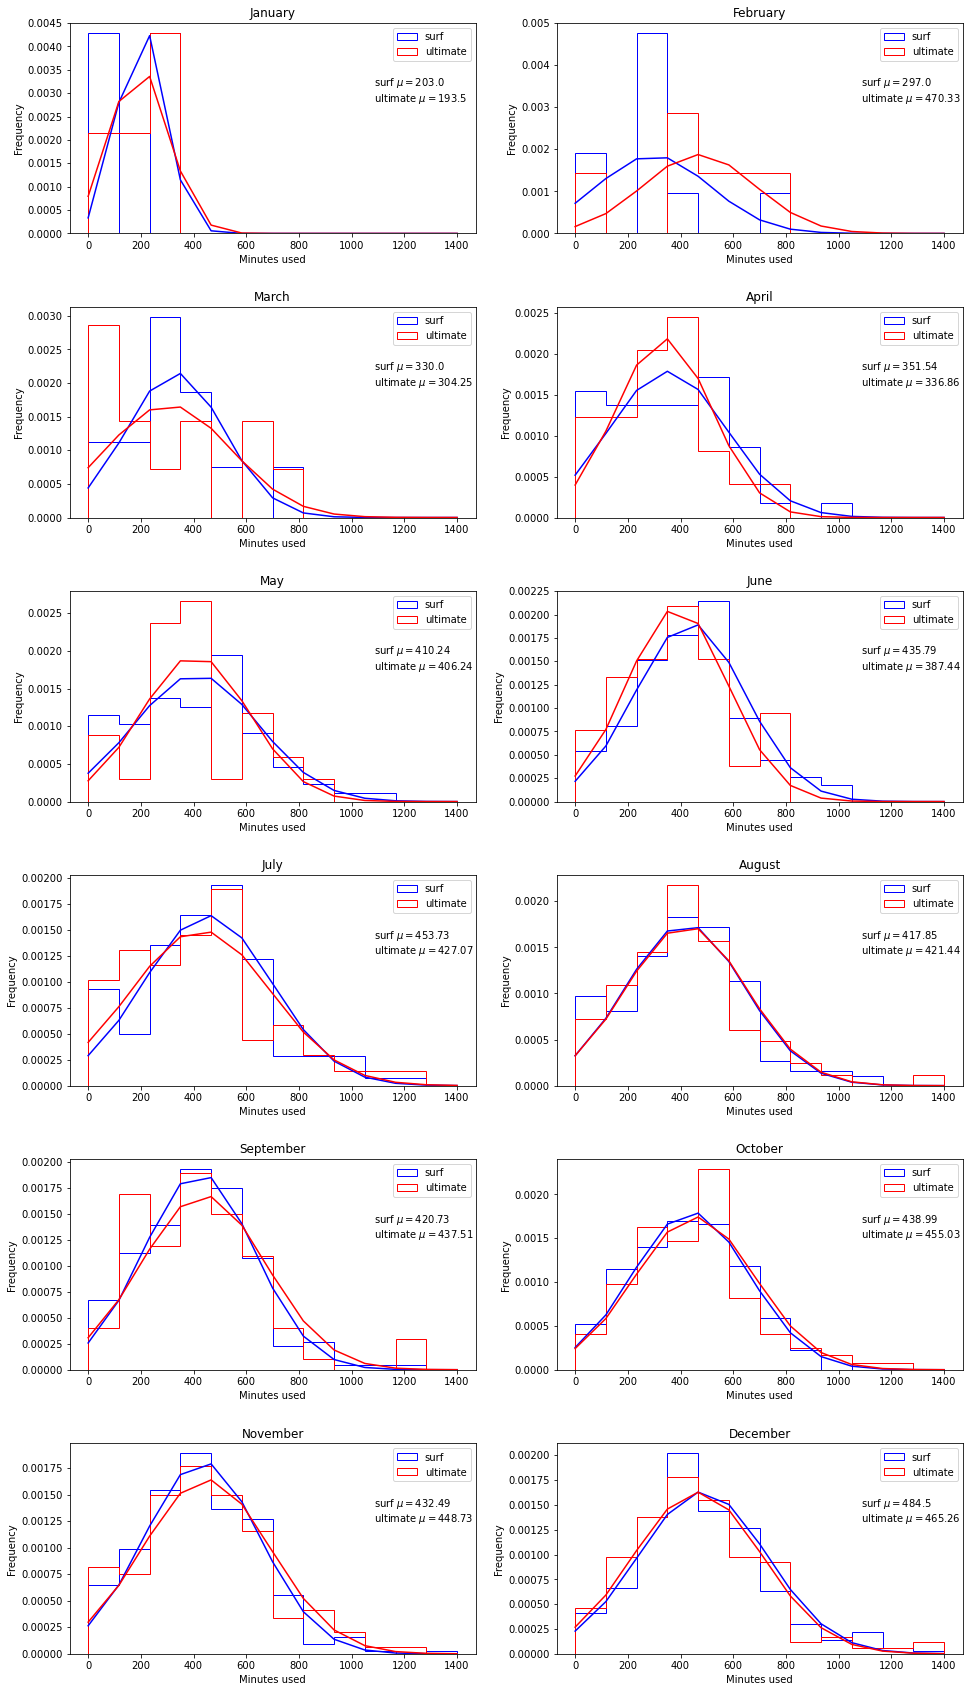

In [25]:
# plot histograms of minutes per month for both plans

fig, axes = plt.subplots(6, 2, figsize=(16, 30))
axes = axes.reshape(-1)
plt.subplots_adjust(hspace=0.35)
bins = 12

for month in range(0, 12):
    surf_mu = surfers_mins_per_month_no_zeros_stats.loc['nanmean', month + 1]
    surf_sigma = surfers_mins_per_month_no_zeros_stats.loc['nanstd', month + 1]
    
    ultimate_mu = ultimaters_mins_per_month_no_zeros_stats.loc['nanmean', month + 1]
    ultimate_sigma = ultimaters_mins_per_month_no_zeros_stats.loc['nanstd', month + 1] 
    
    surf_n, surf_bins, surf_patches = axes[month].hist(surfers_mins_per_month_no_zeros[month + 1],
                                                       bins=bins,
                                                       range=(0, 1400),
                                                       density=True,
                                                       histtype='step',
                                                       color='blue'
                                                      )
    
    ultimate_n, ultimate_bins, ultimate_patches = axes[month].hist(ultimaters_mins_per_month_no_zeros[month + 1],
                                                                   bins=bins,
                                                                   range=(0, 1400),
                                                                   density=True,
                                                                   histtype='step',
                                                                   color='red'
                                                                  )
    
    axes[month].set_title(month_list[month])
    axes[month].set_xlabel('Minutes used')
    axes[month].set_ylabel('Frequency')
    axes[month].legend(['surf', 'ultimate'])
    axes[month].annotate(xy=(0.75, 0.7), text='surf $\mu=$' + str(surf_mu.round(2)), xycoords='axes fraction')
    axes[month].annotate(xy=(0.75, 0.625), text='ultimate $\mu=$' + str(ultimate_mu.round(2)), xycoords='axes fraction')
    
    surf_best_fit_line = st.norm.pdf(surf_bins, surf_mu, surf_sigma)  
    axes[month].plot(surf_bins, surf_best_fit_line, color='blue')
    
    ultimate_best_fit_line = st.norm.pdf(ultimate_bins, ultimate_mu, ultimate_sigma)
    axes[month].plot(ultimate_bins, ultimate_best_fit_line, color='red')

plt.show()

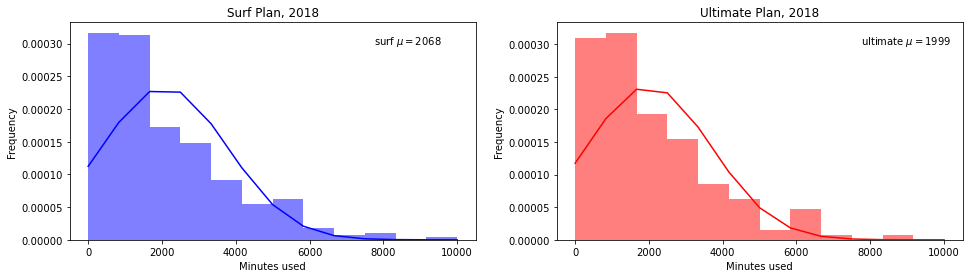

In [38]:
# plot histograms of minutes for the entire year for both plans

fig, axes = plt.subplots(1, 2, figsize=(16, 4))
axes = axes.reshape(-1)
num_bins = 12


surf_mu = surfers_mins_per_month_no_zeros.transpose().sum().mean()  # find mean for surfers
surf_sigma = surfers_mins_per_month_no_zeros.transpose().sum().std()  # find std deviation for surfers

n, bins, patches = axes[0].hist(surfers_mins_per_month_no_zeros.transpose().sum(),
                                bins=num_bins,
                                density=True,
                                range=(0, 10000),
                                color='blue',
                                alpha=0.5
                               )

axes[0].set_title('Surf Plan, 2018')
axes[0].set_xlabel('Minutes used')
axes[0].set_ylabel('Frequency')
axes[0].annotate(xy=(0.75, 0.9), text='surf $\mu=$' + str(int(surf_mu)), xycoords='axes fraction')
best_fit_line = st.norm.pdf(bins, surf_mu, surf_sigma)  
axes[0].plot(bins, best_fit_line, color='blue')  # plot best fit line


ultimate_mu = ultimaters_mins_per_month_no_zeros.transpose().sum().mean()  # find mean for ultimaters
ultimate_sigma = ultimaters_mins_per_month_no_zeros.transpose().sum().std()  # find std deviation for ultimaters

n, bins, patches = axes[1].hist(ultimaters_mins_per_month_no_zeros.transpose().sum(),
                                bins=num_bins,
                                density=True,
                                range=(0, 10000),
                                color='red',
                                alpha=0.5
                               )

axes[1].set_title('Ultimate Plan, 2018')
axes[1].set_xlabel('Minutes used')
axes[1].set_ylabel('Frequency')
axes[1].annotate(xy=(0.75, 0.9), text='ultimate $\mu=$' + str(int(ultimate_mu)), xycoords='axes fraction')
best_fit_line = st.norm.pdf(bins, ultimate_mu, ultimate_sigma)
axes[1].plot(bins, best_fit_line, color='red')  # plot best fit line

plt.show()

##### Conclusion <a name="step_3_1_1"></a>
The number of minutes used per month is normally distributed for both Surf and Ultimate plans across all 12 months. Earlier months in the year have a lot of users with zero minutes used. This is because the data wasn't collected until the user had subscribed to a plan. Earlier in the year, there weren't many subscribers. As the year progresses, that the data becomes more meaningful as new users are added to each plan. The mean number of minutes used for each plan is roughly the same.

Looking at the data for the entire year, we can see the distributions for Surf and Ultimate are also approximately the same. Yearly data when compared to monthly data shows considerable positive skew. As number of minutes for the year increases, the number of users decreases.

It looks like those on the Ultimate plan aren't very aware of their minutes usage. The majority of these customers never exceed the 3000 monthly minutes provided by the plan. This is good news for Megaline though, since these customers use roughly the same phone call rescources as the those on the Surf plan but pay more than triple the price!

#### Histograms of messages sent per month by plan <a name="step_3_2"></a>

C:\Users\nmada\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1760: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


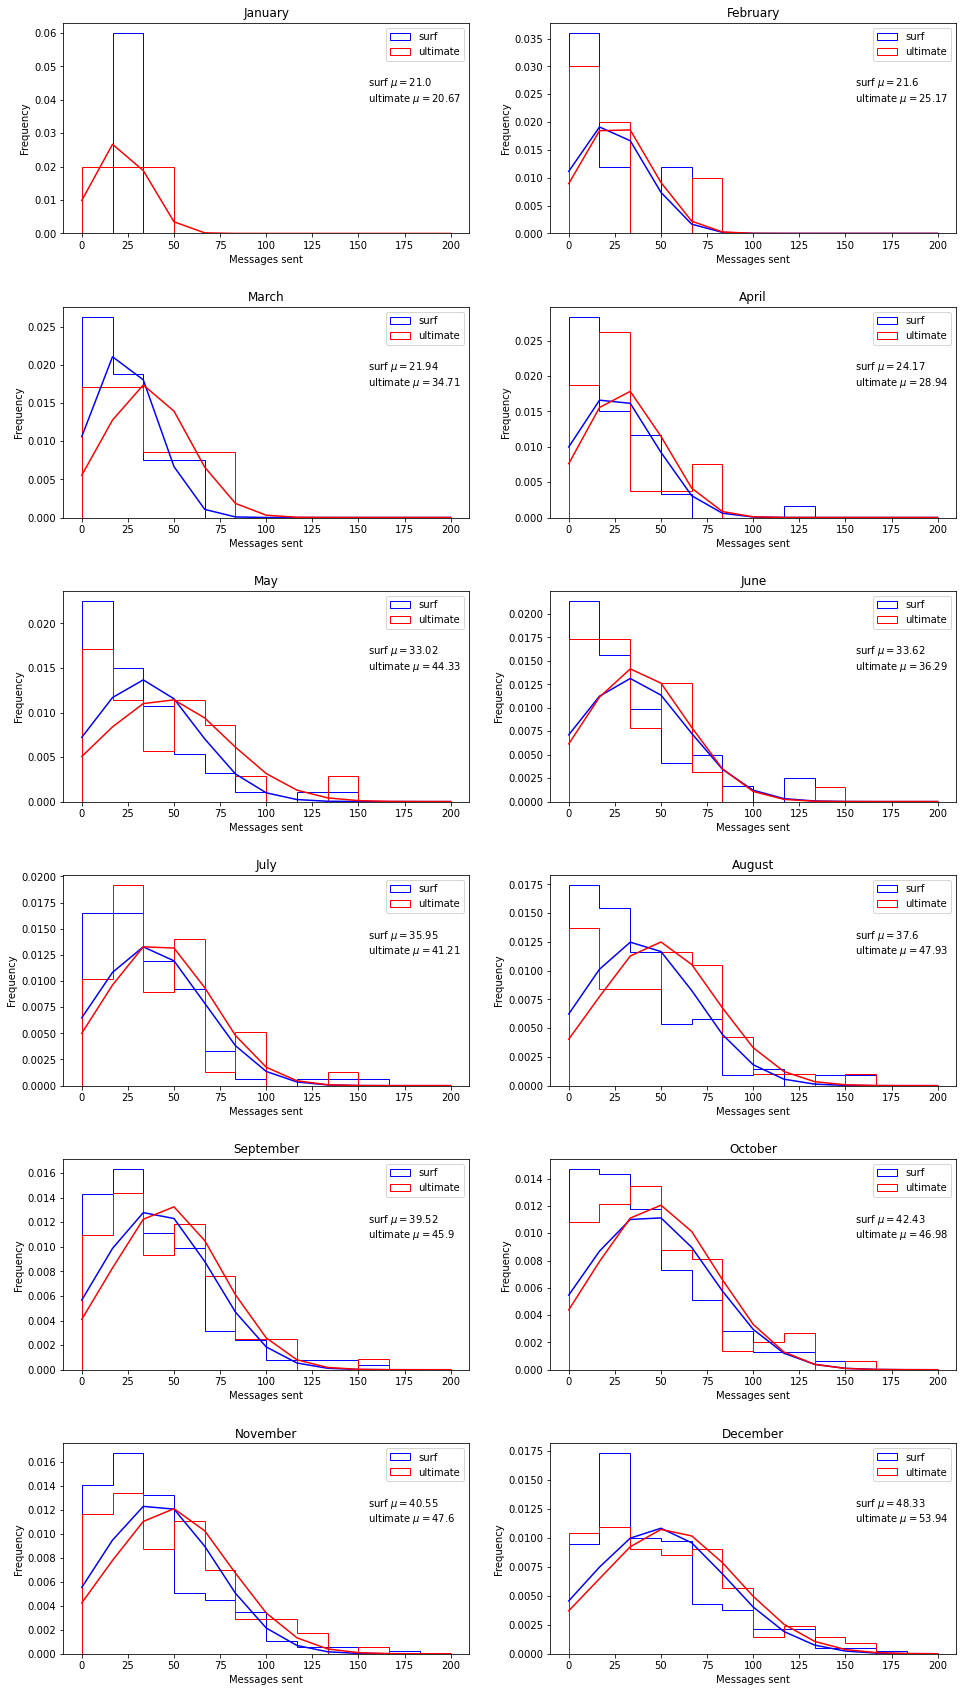

In [40]:
# plot histograms of messages per month for both plans

fig, axes = plt.subplots(6, 2, figsize=(16, 30))
axes = axes.reshape(-1)
plt.subplots_adjust(hspace=0.35)
bins = 12

for month in range(0, 12):
    surf_mu = surfers_messages_per_month_no_zeros_stats.loc['nanmean', month + 1]
    surf_sigma = surfers_messages_per_month_no_zeros_stats.loc['nanstd', month + 1]
    
    ultimate_mu = ultimaters_messages_per_month_no_zeros_stats.loc['nanmean', month + 1]
    ultimate_sigma = ultimaters_messages_per_month_no_zeros_stats.loc['nanstd', month + 1]
    
    surf_n, surf_bins, surf_patches = axes[month].hist(surfers_messages_per_month_no_zeros[month + 1],
                                                       bins=bins,
                                                       range=(0, 200),
                                                       density=True,
                                                       histtype='step',
                                                       color='blue'
                                                      )
    
    ultimate_n, ultimate_bins, ultimate_patches = axes[month].hist(ultimaters_messages_per_month_no_zeros[month + 1],
                                                                   bins=bins,
                                                                   range=(0, 200),
                                                                   density=True,
                                                                   histtype='step',
                                                                   color='red'
                                                                  )
    
    axes[month].set_title(month_list[month])
    axes[month].set_xlabel('Messages sent')
    axes[month].set_ylabel('Frequency')
    axes[month].legend(['surf', 'ultimate'])
    axes[month].annotate(xy=(0.75, 0.7), text='surf $\mu=$' + str(surf_mu.round(2)), xycoords='axes fraction')
    axes[month].annotate(xy=(0.75, 0.625), text='ultimate $\mu=$' + str(ultimate_mu.round(2)), xycoords='axes fraction')
    
    surf_best_fit_line = st.norm.pdf(surf_bins, surf_mu, surf_sigma)  
    axes[month].plot(surf_bins, surf_best_fit_line, color='blue')
    
    ultimate_best_fit_line = st.norm.pdf(ultimate_bins, ultimate_mu, ultimate_sigma)
    axes[month].plot(ultimate_bins, ultimate_best_fit_line, color='red')

plt.show()

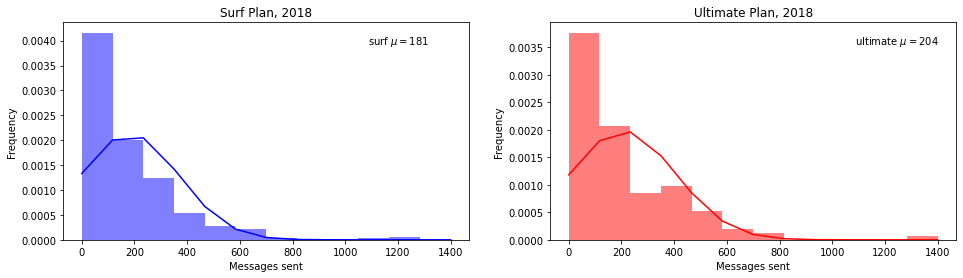

In [41]:
# plot histograms of messages sent for the entire year for both plans

fig, axes = plt.subplots(1, 2, figsize=(16, 4))
axes = axes.reshape(-1)
num_bins = 12


surf_mu = surfers_messages_per_month_no_zeros.transpose().sum().mean()  # find mean for surfers
surf_sigma = surfers_messages_per_month_no_zeros.transpose().sum().std()  # find std deviation for surfers

n, bins, patches = axes[0].hist(surfers_messages_per_month_no_zeros.transpose().sum(),
                                bins=num_bins,
                                density=True,
                                range=(0, 1400),
                                color='blue',
                                alpha=0.5
                               )

axes[0].set_title('Surf Plan, 2018')
axes[0].set_xlabel('Messages sent')
axes[0].set_ylabel('Frequency')
axes[0].annotate(xy=(0.75, 0.9), text='surf $\mu=$' + str(int(surf_mu)), xycoords='axes fraction')
best_fit_line = st.norm.pdf(bins, surf_mu, surf_sigma)  
axes[0].plot(bins, best_fit_line, color='blue')  # plot best fit line


ultimate_mu = ultimaters_messages_per_month_no_zeros.transpose().sum().mean()  # find mean for ultimaters
ultimate_sigma = ultimaters_messages_per_month_no_zeros.transpose().sum().std()  # find std deviation for ultimaters

n, bins, patches = axes[1].hist(ultimaters_messages_per_month_no_zeros.transpose().sum(),
                                bins=num_bins,
                                density=True,
                                range=(0, 1400),
                                color='red',
                                alpha=0.5
                               )

axes[1].set_title('Ultimate Plan, 2018')
axes[1].set_xlabel('Messages sent')
axes[1].set_ylabel('Frequency')
axes[1].annotate(xy=(0.75, 0.9), text='ultimate $\mu=$' + str(int(ultimate_mu)), xycoords='axes fraction')
best_fit_line = st.norm.pdf(bins, ultimate_mu, ultimate_sigma)
axes[1].plot(bins, best_fit_line, color='red')  # plot best fit line

plt.show()

##### Conclusion <a name="step_3_2_1"></a>
The number of messages per month is also normally distributed, but here we can see there is a significant positive skew. This means that the mean is greater than the median for the number of messages sent per month. Means between plans are very similar, just like the previous set comparing number of minutes.

Comparing the distributions for each month with the yearly distribution shows us this same positive skew. The majority of people send less than 500 texts each year, and very few send more than 800 per year.

Those on the Surf plan exceed the 50 monthly message allowance quite frequently. Maybe they need to keep an eye on the number of messages sent. But again, this is good news for Megaline because these overages translate into added revenue. Those on the Ultimate plan rarely exceed the 1000 allotted messages per month, but they also pay a \\$70 plan fee per month versus \\$20 for the Surf plan.

#### Histograms of data used per month by plan <a name="step_3_3"></a>

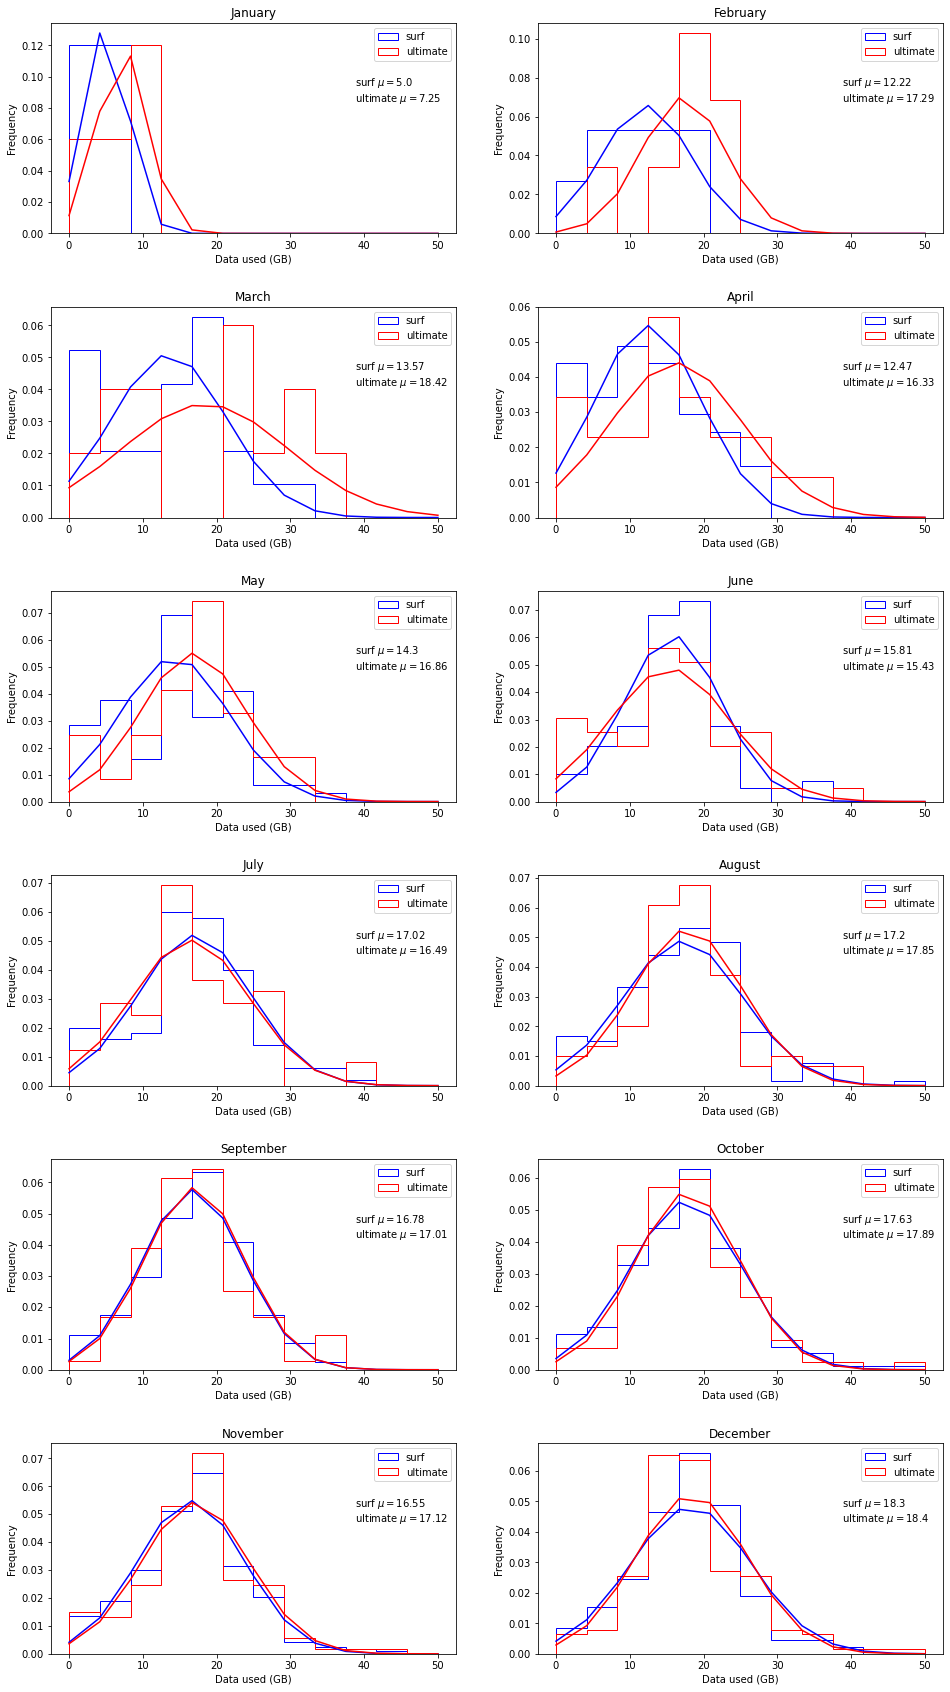

In [42]:
# plot histograms of data used per month for both plans

fig, axes = plt.subplots(6, 2, figsize=(16, 30))
axes = axes.reshape(-1)
plt.subplots_adjust(hspace=0.35)
bins = 12

for month in range(0, 12):
    surf_mu = surfers_gb_per_month_no_zeros_stats.loc['nanmean', month + 1]
    surf_sigma = surfers_gb_per_month_no_zeros_stats.loc['nanstd', month + 1]
    
    ultimate_mu = ultimaters_gb_per_month_no_zeros_stats.loc['nanmean', month + 1]
    ultimate_sigma = ultimaters_gb_per_month_no_zeros_stats.loc['nanstd', month + 1]
    
    surf_n, surf_bins, surf_patches = axes[month].hist(surfers_gb_per_month_no_zeros[month + 1],
                                                       bins=bins,
                                                       range=(0, 50),
                                                       density=True,
                                                       histtype='step',
                                                       color='blue'
                                                      )
    
    ultimate_n, ultimate_bins, ultimate_patches = axes[month].hist(ultimaters_gb_per_month_no_zeros[month + 1],
                                                                   bins=bins,
                                                                   range=(0, 50),
                                                                   density=True,
                                                                   histtype='step',
                                                                   color='red'
                                                                  )
    
    axes[month].set_title(month_list[month])
    axes[month].set_xlabel('Data used (GB)')
    axes[month].set_ylabel('Frequency')
    axes[month].legend(['surf', 'ultimate'])
    axes[month].annotate(xy=(0.75, 0.7), text='surf $\mu=$' + str(surf_mu.round(2)), xycoords='axes fraction')
    axes[month].annotate(xy=(0.75, 0.625), text='ultimate $\mu=$' + str(ultimate_mu.round(2)), xycoords='axes fraction')
    
    surf_best_fit_line = st.norm.pdf(surf_bins, surf_mu, surf_sigma)  
    axes[month].plot(surf_bins, surf_best_fit_line, color='blue')
    
    ultimate_best_fit_line = st.norm.pdf(ultimate_bins, ultimate_mu, ultimate_sigma)
    axes[month].plot(ultimate_bins, ultimate_best_fit_line, color='red')

plt.show()

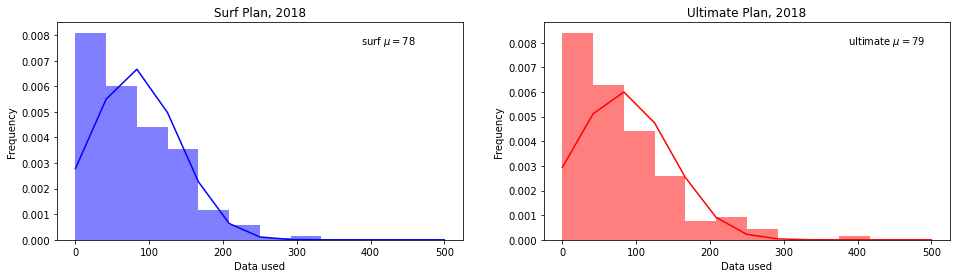

In [44]:
# plot histograms of data used for the entire year for both plans

fig, axes = plt.subplots(1, 2, figsize=(16, 4))
axes = axes.reshape(-1)
num_bins = 12


surf_mu = surfers_gb_per_month.transpose().sum().mean()  # find mean for surfers
surf_sigma = surfers_gb_per_month.transpose().sum().std()  # find std deviation for surfers

n, bins, patches = axes[0].hist(surfers_gb_per_month.transpose().sum(),
                                bins=num_bins,
                                density=True,
                                range=(0, 500),
                                color='blue',
                                alpha=0.5
                               )

axes[0].set_title('Surf Plan, 2018')
axes[0].set_xlabel('Data used')
axes[0].set_ylabel('Frequency')
axes[0].annotate(xy=(0.75, 0.9), text='surf $\mu=$' + str(int(surf_mu)), xycoords='axes fraction')
best_fit_line = st.norm.pdf(bins, surf_mu, surf_sigma)  
axes[0].plot(bins, best_fit_line, color='blue')  # plot best fit line


ultimate_mu = ultimaters_gb_per_month.transpose().sum().mean()  # find mean for ultimaters
ultimate_sigma = ultimaters_gb_per_month.transpose().sum().std()  # find std deviation for ultimaters

n, bins, patches = axes[1].hist(ultimaters_gb_per_month.transpose().sum(),
                                bins=num_bins,
                                density=True,
                                range=(0, 500),
                                color='red',
                                alpha=0.5
                               )

axes[1].set_title('Ultimate Plan, 2018')
axes[1].set_xlabel('Data used')
axes[1].set_ylabel('Frequency')
axes[1].annotate(xy=(0.75, 0.9), text='ultimate $\mu=$' + str(int(ultimate_mu)), xycoords='axes fraction')
best_fit_line = st.norm.pdf(bins, ultimate_mu, ultimate_sigma)
axes[1].plot(bins, best_fit_line, color='red')  # plot best fit line

plt.show()

##### Conclusion <a name="step_3_3_1"></a>
The amount of monthly data used is normally distributed and symmetrical just like the number of minutes used. Again, we've filtered out months with zero data used to make the plot scaling a little better. We need to keep in mind that the means displayed in all 3 sets of plots are derived from data that still contains these zeros.

As with the previous two sets for yearly data, this one also displays positive skew. Most people use less than 150 GB of data per year, while very few use more than 300 GB. On average, customers use 78 to 79 GB of data for both plans per year.

It appears as if those on the Surf plan often exceed their 15 GB limit. Just like with text messages, this is a good thing for Megaline since each extra gb over the 15 GB monthly limit translates into an additional \\$10 of revenue. So yes, those on the Ultimate plan do pay a higher monthly fee of $70, but when we account for overages, maybe those on the Surf plan bring in just as much or more revenue. We'll find out in the next step of the analysis.

### Step 4: Hypothesis testing <a name="step_4"></a>

Next, we'll do some hypothesis testing on the data. We'll test the following two hypotheses:
- The average revenue from users of Ultimate and Surf calling plans differs
- The average revenue from users in NY-NJ area is different from that of the users from other regions

#### Average revenue between plans is equal <a name="step_4_1"></a>

In [31]:
# comparing mean revenues with and without 0 values (months where the user was not a customer)

surf_rev_no_zeros = surfers_rev_per_month[surfers_rev_per_month != 0]
surf_rev_no_zeros = surf_rev_no_zeros.values[~np.isnan(surf_rev_no_zeros)]

ultimate_rev_no_zeros = ultimaters_rev_per_month[ultimaters_rev_per_month != 0]
ultimate_rev_no_zeros = ultimate_rev_no_zeros.values[~np.isnan(ultimate_rev_no_zeros)]

print('Mean revenue excluding 0 values, Surf: {:.2f}'.format(surf_rev_no_zeros.mean().mean()))
print('Mean revenue including 0 values, Surf: {:.2f}'.format(surfers_rev_per_month.mean().mean()))
print('Mean revenue excluding 0 values, Ultimate: {:.2f}'.format(ultimate_rev_no_zeros.mean().mean()))
print('Mean revenue including 0 values, Ultimate: {:.2f}'.format(ultimaters_rev_per_month.mean().mean()))

Mean revenue excluding 0 values, Surf: 48.26
Mean revenue including 0 values, Surf: 26.42
Mean revenue excluding 0 values, Ultimate: 71.57
Mean revenue including 0 values, Ultimate: 39.27


The means for each plan are significantly impacted by zeros, which represent months before and after the registration and churn dates. For our hypothesis test, we should use the set of data that excludes zeros.

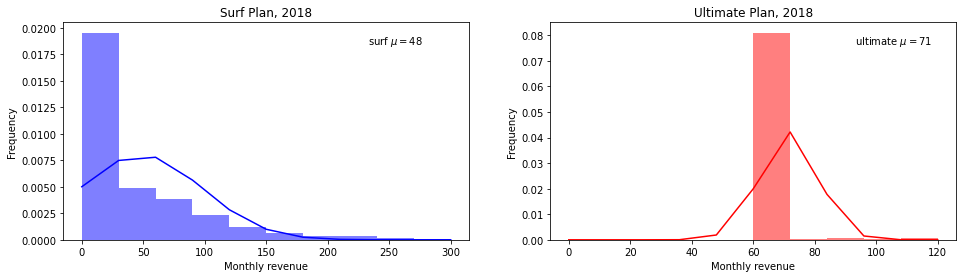

In [45]:
# plot histograms of yearly revenue for both plans

fig, axes = plt.subplots(1, 2, figsize=(16, 4))
axes = axes.reshape(-1)
num_bins = 10


surf_mu = surf_rev_no_zeros.mean()  # find mean for surfers
surf_sigma = surf_rev_no_zeros.std()  # find std deviation for surfers

n, bins, patches = axes[0].hist(surf_rev_no_zeros,
                                bins=num_bins,
                                density=True,
                                range=(0, 300),
                                color='blue',
                                alpha=0.5
                               )

axes[0].set_title('Surf Plan, 2018')
axes[0].set_xlabel('Monthly revenue')
axes[0].set_ylabel('Frequency')
axes[0].annotate(xy=(0.75, 0.9), text='surf $\mu=$' + str(int(surf_mu)), xycoords='axes fraction')
best_fit_line = st.norm.pdf(bins, surf_mu, surf_sigma)  
axes[0].plot(bins, best_fit_line, color='blue')  # plot best fit line


ultimate_mu = ultimate_rev_no_zeros.mean()  # find mean for ultimaters
ultimate_sigma = ultimate_rev_no_zeros.std()  # find std deviation for ultimaters

n, bins, patches = axes[1].hist(ultimate_rev_no_zeros,
                                bins=num_bins,
                                density=True,
                                range=(0, 120),
                                color='red',
                                alpha=0.5
                               )

axes[1].set_title('Ultimate Plan, 2018')
axes[1].set_xlabel('Monthly revenue')
axes[1].set_ylabel('Frequency')
axes[1].annotate(xy=(0.75, 0.9), text='ultimate $\mu=$' + str(int(ultimate_mu)), xycoords='axes fraction')
best_fit_line = st.norm.pdf(bins, ultimate_mu, ultimate_sigma)
axes[1].plot(bins, best_fit_line, color='red')  # plot best fit line

plt.show()

In [33]:
# run p-test

print('Surf revenue variance: {:.2f}'.format(surf_rev_no_zeros.var()))
print('Ultimate revenue variance: {:.2f}\n'.format(ultimate_rev_no_zeros.var()))

results = st.ttest_ind(surf_rev_no_zeros, ultimate_rev_no_zeros, equal_var=False)

alpha = 0.05

print('Null hypothesis:\n   The average monthly revenue between plans is equal\n')
print('Alternative hypothesis:\n   The average monthly revenue for the Ultimate plan is greater than the average monthly revenue for the Surf plan\n')
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

Surf revenue variance: 2478.61
Ultimate revenue variance: 89.24

Null hypothesis:
   The average monthly revenue between plans is equal

Alternative hypothesis:
   The average monthly revenue for the Ultimate plan is greater than the average monthly revenue for the Surf plan

p-value:  8.36452316708893e-93
We reject the null hypothesis


##### Conclusion <a name="step_4_1_1"></a>
The p-value is far below our critical statistical significance level of 0.05. Therefore, we reject the null hypothesis that the average monthly revenue between plans are equal. Monthly revenues between plans are significantly different. This means we are in favor of the alternative hypothesis that the Ultimate plan has a higher average monthly revenue. We should focus marketing efforts on selling the Ultimate plan to new and existing customers. Now, let's test whether the average revenue from users in the NY-NJ area differs from that of other areas in the country.

#### Average revenue between NY-NJ & all other areas is equal <a name="step_4_2"></a>

In [34]:
# get user IDs, revenues per month, & remove zeros for both demographics

ny_nj_users = users_data.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')['user_id']
not_ny_nj_users = users_data.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')['user_id']

ny_nj_rev_per_month = rev_per_month[rev_per_month.index.isin(ny_nj_users)]
not_ny_nj_rev_per_month = rev_per_month[rev_per_month.index.isin(not_ny_nj_users)]

ny_nj_rev_no_zeros = ny_nj_rev_per_month[ny_nj_rev_per_month != 0]
ny_nj_rev_no_zeros = ny_nj_rev_no_zeros.values[~np.isnan(ny_nj_rev_no_zeros)]

not_ny_nj_rev_no_zeros = not_ny_nj_rev_per_month[not_ny_nj_rev_per_month != 0]
not_ny_nj_rev_no_zeros = not_ny_nj_rev_no_zeros.values[~np.isnan(not_ny_nj_rev_no_zeros)]

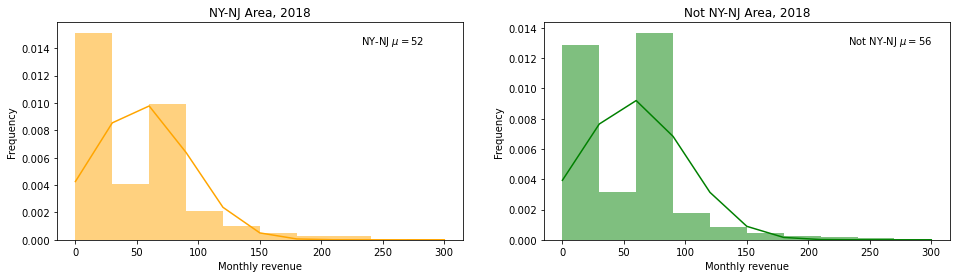

In [46]:
# plot histograms of yearly revenue for both plans

fig, axes = plt.subplots(1, 2, figsize=(16, 4))
axes = axes.reshape(-1)
num_bins = 10


ny_nj_mu = ny_nj_rev_no_zeros.mean()  # find mean for surfers
ny_nj_sigma = ny_nj_rev_no_zeros.std()  # find std deviation for surfers

n, bins, patches = axes[0].hist(ny_nj_rev_no_zeros,
                                bins=num_bins,
                                density=True,
                                range=(0, 300),
                                color='orange',
                                alpha=0.5
                               )

axes[0].set_title('NY-NJ Area, 2018')
axes[0].set_xlabel('Monthly revenue')
axes[0].set_ylabel('Frequency')
axes[0].annotate(xy=(0.75, 0.9), text='NY-NJ $\mu=$' + str(int(ny_nj_mu)), xycoords='axes fraction')
best_fit_line = st.norm.pdf(bins, ny_nj_mu, ny_nj_sigma)  
axes[0].plot(bins, best_fit_line, color='orange')  # plot best fit line


not_ny_nj_mu = not_ny_nj_rev_no_zeros.mean()  # find mean for ultimaters
not_ny_nj_sigma = not_ny_nj_rev_no_zeros.std()  # find std deviation for ultimaters

n, bins, patches = axes[1].hist(not_ny_nj_rev_no_zeros,
                                bins=num_bins,
                                density=True,
                                range=(0, 300),
                                color='green',
                                alpha=0.5
                               )

axes[1].set_title('Not NY-NJ Area, 2018')
axes[1].set_xlabel('Monthly revenue')
axes[1].set_ylabel('Frequency')
axes[1].annotate(xy=(0.75, 0.9), text='Not NY-NJ $\mu=$' + str(int(not_ny_nj_mu)), xycoords='axes fraction')
best_fit_line = st.norm.pdf(bins, not_ny_nj_mu, not_ny_nj_sigma)
axes[1].plot(bins, best_fit_line, color='green')  # plot best fit line

plt.show()

In [47]:
# run p-test

print('NY-NJ area revenue variance: {:.2f}'.format(ny_nj_rev_no_zeros.var()))
print('Not NY-NJ area revenue variance: {:.2f}\n'.format(not_ny_nj_rev_no_zeros.var()))

results = st.ttest_ind(ny_nj_rev_no_zeros, not_ny_nj_rev_no_zeros)

alpha = 0.05

print('Null hypothesis:\n   The average monthly revenue between areas is equal\n')
print('Alternative hypothesis:\n   The average monthly revenue of the NY-NJ area is less than the average monthly revenue of other areas\n')
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

NY-NJ area revenue variance: 1601.82
Not NY-NJ area revenue variance: 1868.43

Null hypothesis:
   The average monthly revenue between areas is equal

Alternative hypothesis:
   The average monthly revenue of the NY-NJ area is less than the average monthly revenue of other areas

p-value:  0.03240913803409851
We reject the null hypothesis


##### Conclusion <a name="step_4_2_1"></a>
The p-value for this test is much closer to our critical statistical significance value of 0.05, but still falls below it. This means that the difference between mean revenues for people in the NY-NJ area and all other areas is statistically significant. We can reject the null hypothesis in favor of the alternative hypothesis and focus marketing efforts to areas outside of the NY-NJ area.

### Step 5: Overall conclusion <a name="step_5"></a>

#### Project overview <a name="step_5_1"></a>
Our initial goal here was to determine whether or not average revenue between the Surf and Ultimate plans differed significantly enough to warrant greater allocation of marketing resources towards one or the other.

During data preprocessing, we cleaned the data and addressed a few anomalies found after our initial look at the dataset:
- Replaced missing values in the **churn_date** column with 2018-12-31, the last day of the year.
- Changed all dates from *object* to *datetime* data type
- Changed **user_id** columns from *int64* to *object* data type
- Rounded the **duration** column up to minutes, and changed type from *float64* to *int64*
- Changed **usd_per_message** and **usd_per_minute** to *int64*
- Calculated the total data used per month, rounded up to the nearest gb, and changed type to *int64*
- Decided to keep the data where **call_duration** was zero
- Found where messages, sessions, and calls occurred after the churn date. We decided to keep this data as well
- Found monthly sums and counts using pivot tables for the following:
    - number of calls made per month
    - minutes used per month
    - number of text messages per month
    - volume of data per month
    - monthly revenue from each user

After an in-depth analysis where we first calculated monthly call duration, data usage, and text messages sent, we're able to calculate monthly revenue for each user.

With monthly revenues tied to user IDs, we then split the data into the two demographics and performed a p-test to determine whether or not differences in mean monthly revenues between plans was statistically significant.

#### Suggestions <a name="step_5_2"></a>
We determined that the difference in average revenue between plans was statistically significant. The mean monthly revenue for the Ultimate plan is greater than that of the Surf plan. The marketing department should therefore focus advertising resources on the Ultimate plan.

We also determined that the difference in average revenue between NY-NJ area and all other areas is statistically significant. The mean revenue from customers from all other areas outside of the NY-NJ area is greater than that of the NY-NJ area. We should therefore focus resources to areas outside the NY-NJ area.